In [1]:
import pandas as pd
import numpy as np
import re
%matplotlib inline

data_files = [
    "C:\\Users\\ngass\\Downloads\\ap_2010.csv",
    "C:\\Users\\ngass\\Downloads\\class_size.csv",
    "C:\\Users\\ngass\\Downloads\\demographics.csv",
    "C:\\Users\\ngass\\Downloads\\graduation.csv",
    "C:\\Users\\ngass\\Downloads\\hs_directory.csv",
    "C:\\Users\\ngass\\Downloads\\sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("{0}".format(f))
    data[f.replace(".csv", "").replace("C:\\Users\\ngass\\Downloads\\", "")] = d

In [2]:
print(data)
print(type(data.values()))

{'ap_2010':         DBN                                         SchoolName  \
0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
1    01M450                             EAST SIDE COMMUNITY HS   
2    01M515                                LOWER EASTSIDE PREP   
3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
4    02M296              High School of Hospitality Management   
..      ...                                                ...   
253  31R605                         STATEN ISLAND TECHNICAL HS   
254  32K545                      EBC-HS FOR PUB SERVICE (BUSH)   
255  32K552                          Academy of Urban Planning   
256  32K554               All City Leadership Secondary School   
257  32K556  Bushwick Leaders High School for Academic Exce...   

    AP Test Takers  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                39                49                                   10  
1                19                21    

In [3]:
all_survey = pd.read_csv("C:\\Users\\ngass\\Downloads\\survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("C:\\Users\\ngass\\Downloads\\survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

In [4]:
print(data.keys())

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])


In [5]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [6]:
print(data["class_size"].columns)
print(data["sat_results"].columns)
print(data["hs_directory"].columns)

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'padded_csd', 'DBN'],
      dtype='object')
Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')
Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',


In [7]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [8]:
print(data["sat_results"].columns)
print(data["hs_directory"].columns)

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score'],
      dtype='object')
Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
      

In [9]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [10]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

In [11]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [12]:
for c in combined.columns:
   print(c)

DBN
SCHOOL NAME
Num of SAT Test Takers
SAT Critical Reading Avg. Score
SAT Math Avg. Score
SAT Writing Avg. Score
sat_score
SchoolName
AP Test Takers 
Total Exams Taken
Number of Exams with scores 3 4 or 5
Demographic
School Name
Cohort
Total Cohort
Total Grads - n
Total Grads - % of cohort
Total Regents - n
Total Regents - % of cohort
Total Regents - % of grads
Advanced Regents - n
Advanced Regents - % of cohort
Advanced Regents - % of grads
Regents w/o Advanced - n
Regents w/o Advanced - % of cohort
Regents w/o Advanced - % of grads
Local - n
Local - % of cohort
Local - % of grads
Still Enrolled - n
Still Enrolled - % of cohort
Dropped Out - n
Dropped Out - % of cohort
CSD
NUMBER OF SECTIONS
AVERAGE CLASS SIZE
SIZE OF SMALLEST CLASS
SIZE OF LARGEST CLASS
SCHOOLWIDE PUPIL-TEACHER RATIO
Name
schoolyear
fl_percent
frl_percent
total_enrollment
prek
k
grade1
grade2
grade3
grade4
grade5
grade6
grade7
grade8
grade9
grade10
grade11
grade12
ell_num
ell_percent
sped_num
sped_percent
ctt_num
se

In [13]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [14]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.412667
                                     ...   
priority10                              NaN
Community Board                   -0.060919
Council District                  -0.076151
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 78, dtype: float64


# Plotting survey correlations

<AxesSubplot:>

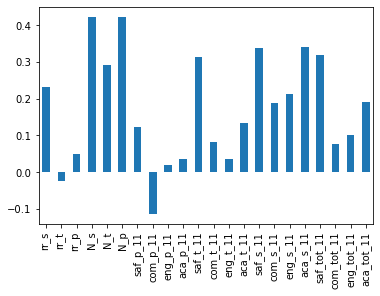

In [15]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
combined.corr()["sat_score"][survey_fields].plot.bar() 

<AxesSubplot:xlabel='saf_s_11', ylabel='sat_score'>

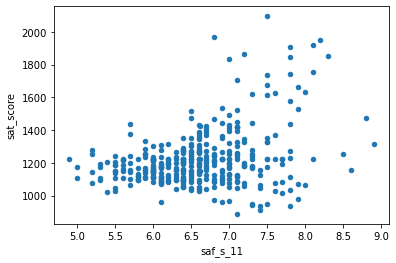

In [16]:
combined.plot.scatter(x="saf_s_11", y="sat_score")

it seems to me there is some positiv correlation

In [17]:
print(combined["borough"])

0      Manhattan
1      Manhattan
2      Manhattan
3      Manhattan
4      Manhattan
         ...    
358     Brooklyn
359     Brooklyn
360     Brooklyn
361     Brooklyn
362     Brooklyn
Name: borough, Length: 363, dtype: object


In [18]:
boros=combined.groupby("borough").agg(np.mean)["saf_s_11"]
print(boros)

borough
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


Brooklyn hast the lowest safety score among students

<AxesSubplot:>

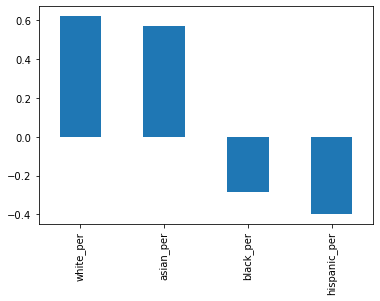

In [19]:
cols=["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][cols].plot.bar()

shools with a higher percentage of white and aisan race have a high sat_score, whereas scholls with a higher percetange of black and hispanic have a lower sat_score

<AxesSubplot:xlabel='hispanic_per', ylabel='sat_score'>

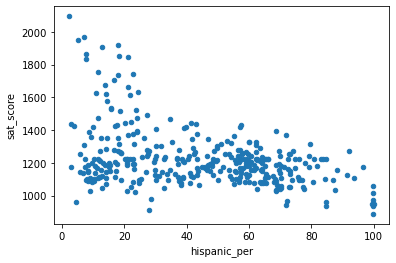

In [20]:
combined.plot.scatter(x="hispanic_per", y="sat_score")

majority of schools with the higher percentage of hispanic has a lower sat_score

In [21]:
hispanic_95=combined[combined["hispanic_per"]>95]

In [22]:
print(hispanic_95["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [23]:
print(combined[combined["hispanic_per"]>95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [24]:
print(combined[(combined["hispanic_per"]<10) & (combined["sat_score"]> 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


<AxesSubplot:>

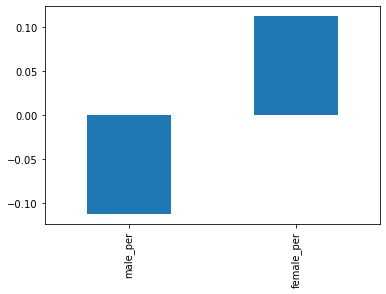

In [25]:
male_female=["male_per", "female_per"]
combined.corr()["sat_score"][male_female].plot.bar()

<AxesSubplot:xlabel='female_per', ylabel='sat_score'>

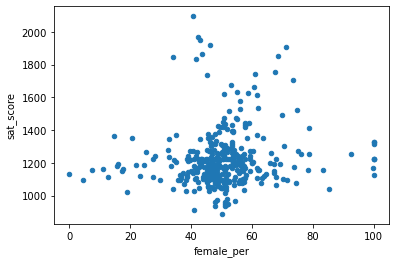

In [26]:
combined.plot.scatter("female_per","sat_score")

there is some positive correlation between female_per between 30 and 80 percentage female percentage but the higher the weaker this correlation

In [27]:
print(combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [29]:
combined["ap_per"]=combined["AP Test Takers "]/combined["total_enrollment"]

In [30]:
print(combined["ap_per"])

0      0.254549
1      0.098985
2      0.031773
3      0.292696
4      0.158091
         ...   
358    0.077558
359    0.247510
360    0.190955
361    0.026616
362    0.073593
Name: ap_per, Length: 363, dtype: float64


<AxesSubplot:xlabel='ap_per', ylabel='sat_score'>

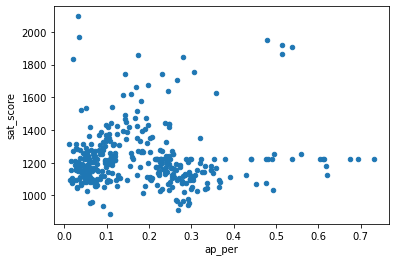

In [31]:
combined.plot.scatter(x="ap_per", y="sat_score")

In [32]:
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers ',
       'Total Exams Taken',
       ...
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'lat', 'lon', 'school_dist', 'ap_per'],
      dtype='object', length=166)

In [33]:
combined.shape

(363, 166)

In [34]:
for c in combined.columns:
    print(c)

DBN
SCHOOL NAME
Num of SAT Test Takers
SAT Critical Reading Avg. Score
SAT Math Avg. Score
SAT Writing Avg. Score
sat_score
SchoolName
AP Test Takers 
Total Exams Taken
Number of Exams with scores 3 4 or 5
Demographic
School Name
Cohort
Total Cohort
Total Grads - n
Total Grads - % of cohort
Total Regents - n
Total Regents - % of cohort
Total Regents - % of grads
Advanced Regents - n
Advanced Regents - % of cohort
Advanced Regents - % of grads
Regents w/o Advanced - n
Regents w/o Advanced - % of cohort
Regents w/o Advanced - % of grads
Local - n
Local - % of cohort
Local - % of grads
Still Enrolled - n
Still Enrolled - % of cohort
Dropped Out - n
Dropped Out - % of cohort
CSD
NUMBER OF SECTIONS
AVERAGE CLASS SIZE
SIZE OF SMALLEST CLASS
SIZE OF LARGEST CLASS
SCHOOLWIDE PUPIL-TEACHER RATIO
Name
schoolyear
fl_percent
frl_percent
total_enrollment
prek
k
grade1
grade2
grade3
grade4
grade5
grade6
grade7
grade8
grade9
grade10
grade11
grade12
ell_num
ell_percent
sped_num
sped_percent
ctt_num
se

<AxesSubplot:xlabel='AVERAGE CLASS SIZE', ylabel='sat_score'>

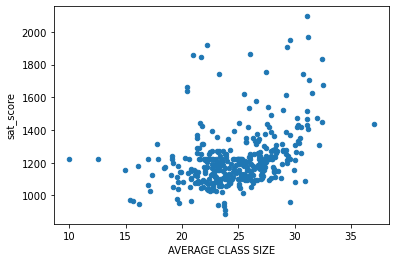

In [35]:
combined.plot.scatter(x="AVERAGE CLASS SIZE", y="sat_score")

there seems to be a positive relationship between average class size and the sat_score

In [37]:
boros_best=combined.groupby("borough").agg(np.mean)["sat_score"]

In [38]:
print(boros_best)

borough
Bronx            1157.598203
Brooklyn         1181.364461
Manhattan        1278.331410
Queens           1286.753032
Staten Island    1382.500000
Name: sat_score, dtype: float64


In [39]:
c=combined[combined["sat_score"]<1000]["SCHOOL NAME"]

In [40]:
print(c)

91                  INTERNATIONAL COMMUNITY HIGH SCHOOL
125                 ACADEMY FOR LANGUAGE AND TECHNOLOGY
126                     BRONX INTERNATIONAL HIGH SCHOOL
139               KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141               INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
179                       HIGH SCHOOL OF WORLD CULTURES
188                  BROOKLYN INTERNATIONAL HIGH SCHOOL
225       INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS
237                          IT TAKES A VILLAGE ACADEMY
253                           MULTICULTURAL HIGH SCHOOL
286              PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [41]:
b=combined[combined["sat_score"]>1200]["SCHOOL NAME"]

In [42]:
print(b)

3                                MARTA VALLE HIGH SCHOOL
4      NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...
5                         BARD HIGH SCHOOL EARLY COLLEGE
10                                      PACE HIGH SCHOOL
11     URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...
                             ...                        
353                              TOTTENVILLE HIGH SCHOOL
354                          SUSAN E. WAGNER HIGH SCHOOL
355    RALPH R. MCKEE CAREER AND TECHNICAL EDUCATION ...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
361                 ALL CITY LEADERSHIP SECONDARY SCHOOL
Name: SCHOOL NAME, Length: 172, dtype: object


In [43]:
a=combined[(combined["sat_score"]>1000) & (combined["sat_score"]<1200)]["SCHOOL NAME"]

In [44]:
print(a)

0          HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1                    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2                             EAST SIDE COMMUNITY SCHOOL
6      47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...
7                           FOOD AND FINANCE HIGH SCHOOL
                             ...                        
357                 ACADEMY FOR ENVIRONMENTAL LEADERSHIP
358          EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK
359                   BUSHWICK SCHOOL FOR SOCIAL JUSTICE
360                            ACADEMY OF URBAN PLANNING
362    BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...
Name: SCHOOL NAME, Length: 178, dtype: object


In [45]:
school={}
for s in c:
    school[s]=1
for s in b:
    school[s]=5
for s in a:
    school[s]=3
    

In [46]:
print(school)

{'INTERNATIONAL COMMUNITY HIGH SCHOOL': 1, 'ACADEMY FOR LANGUAGE AND TECHNOLOGY': 1, 'BRONX INTERNATIONAL HIGH SCHOOL': 1, 'KINGSBRIDGE INTERNATIONAL HIGH SCHOOL': 1, 'INTERNATIONAL SCHOOL FOR LIBERAL ARTS': 1, 'PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE': 1, 'HIGH SCHOOL OF WORLD CULTURES': 1, 'BROOKLYN INTERNATIONAL HIGH SCHOOL': 1, 'INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS': 1, 'IT TAKES A VILLAGE ACADEMY': 1, 'MULTICULTURAL HIGH SCHOOL': 1, 'PAN AMERICAN INTERNATIONAL HIGH SCHOOL': 1, 'MARTA VALLE HIGH SCHOOL': 5, 'NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL': 5, 'BARD HIGH SCHOOL EARLY COLLEGE': 5, 'PACE HIGH SCHOOL': 5, 'URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTION, THE': 5, 'NYC ISCHOOL': 5, 'MANHATTAN BUSINESS ACADEMY': 5, 'BUSINESS OF SPORTS SCHOOL': 5, 'THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY': 5, 'HIGH SCHOOL FOR ENVIRONMENTAL STUDIES': 5, 'PROFESSIONAL PERFORMING ARTS HIGH SCHOOL': 5, 'BARUCH COLLEGE CAMPUS HIGH SCHOOL': 5, 'N.Y.C. LAB S

In [47]:
combined1=pd.DataFrame.from_dict(school, orient="index", columns=["school_score"])

In [48]:
print(combined1)

                                                    school_score
INTERNATIONAL COMMUNITY HIGH SCHOOL                            1
ACADEMY FOR LANGUAGE AND TECHNOLOGY                            1
BRONX INTERNATIONAL HIGH SCHOOL                                1
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL                          1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS                          1
...                                                          ...
ACADEMY FOR ENVIRONMENTAL LEADERSHIP                           3
EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK                    3
BUSHWICK SCHOOL FOR SOCIAL JUSTICE                             3
ACADEMY OF URBAN PLANNING                                      3
BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCEL...             3

[361 rows x 1 columns]


In [49]:
combined1.reset_index(inplace = True)

In [50]:
combined1.rename(columns={"index":"SCHOOL NAME","school_score":"SCHOOL SCORE"}, inplace=True)

In [51]:
combined2=pd.merge(combined, combined1, how="left", on="SCHOOL NAME")

In [52]:
combined1["SCHOOL NAME"]

0                    INTERNATIONAL COMMUNITY HIGH SCHOOL
1                    ACADEMY FOR LANGUAGE AND TECHNOLOGY
2                        BRONX INTERNATIONAL HIGH SCHOOL
3                  KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
4                  INTERNATIONAL SCHOOL FOR LIBERAL ARTS
                             ...                        
356                 ACADEMY FOR ENVIRONMENTAL LEADERSHIP
357          EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK
358                   BUSHWICK SCHOOL FOR SOCIAL JUSTICE
359                            ACADEMY OF URBAN PLANNING
360    BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...
Name: SCHOOL NAME, Length: 361, dtype: object

In [53]:
print(combined2)

        DBN                                        SCHOOL NAME  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                         EAST SIDE COMMUNITY SCHOOL   
3    01M509                            MARTA VALLE HIGH SCHOOL   
4    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
..      ...                                                ...   
358  32K545        EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK   
359  32K549                 BUSHWICK SCHOOL FOR SOCIAL JUSTICE   
360  32K552                          ACADEMY OF URBAN PLANNING   
361  32K554               ALL CITY LEADERSHIP SECONDARY SCHOOL   
362  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                       29                            355.0   
1                       91                            383.0   
2                 

In [54]:
combined=combined2

In [55]:
print(combined)

        DBN                                        SCHOOL NAME  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                         EAST SIDE COMMUNITY SCHOOL   
3    01M509                            MARTA VALLE HIGH SCHOOL   
4    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
..      ...                                                ...   
358  32K545        EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK   
359  32K549                 BUSHWICK SCHOOL FOR SOCIAL JUSTICE   
360  32K552                          ACADEMY OF URBAN PLANNING   
361  32K554               ALL CITY LEADERSHIP SECONDARY SCHOOL   
362  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                       29                            355.0   
1                       91                            383.0   
2                 

In [56]:
combined[["rr_s","rr_t","rr_p","N_p","N_t","N_s"]].apply([np.mean,np.max,np.min])

,rr_s,rr_t,rr_p,N_p,N_t,N_s
mean,80.936639,83.269972,38.947658,247.721763,39.603306,598.208333
amax,100.000000,100.000000,93.000000,2804.000000,244.000000,4768.000000
amin,0.000000,20.000000,4.000000,12.000000,5.000000,70.000000


<AxesSubplot:xlabel='N_s', ylabel='sat_score'>

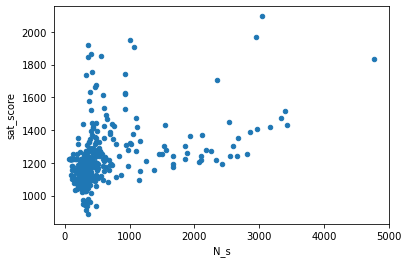

In [57]:
combined.plot.scatter(x="N_s", y="sat_score")

the higher the number of student-respondents the higher the sat_score, which was expected

<AxesSubplot:xlabel='rr_s', ylabel='sat_score'>

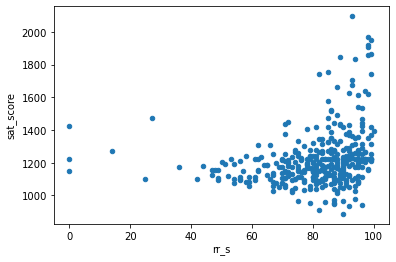

In [58]:
combined.plot.scatter(x="rr_s", y="sat_score")

there is a weak correlation between student response rate and sat_score only above 60 there is a positive correlation

<AxesSubplot:>

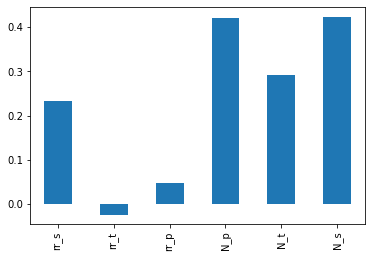

In [59]:
columns=["rr_s","rr_t","rr_p","N_p","N_t","N_s"]
combined.corr()["sat_score"][columns].plot.bar()